In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Statistical Information
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Data Type Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

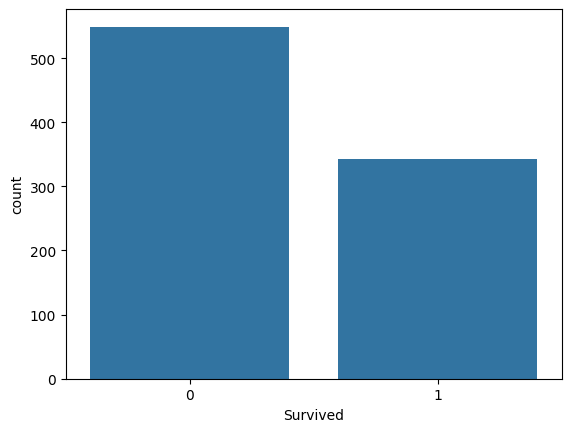

In [7]:
# Exploratory Data Analysis

# Categorical Attributes
sns.countplot(x = train['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

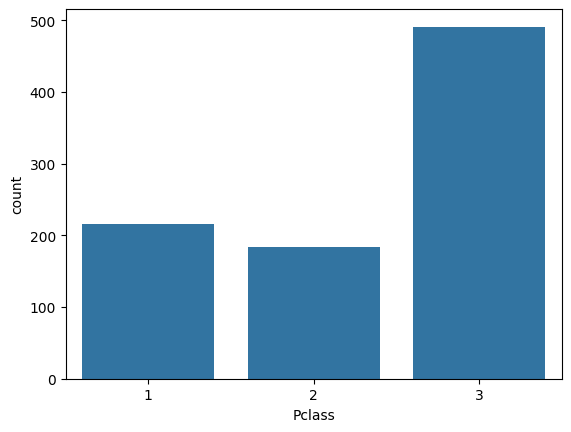

In [8]:
sns.countplot(x = train['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

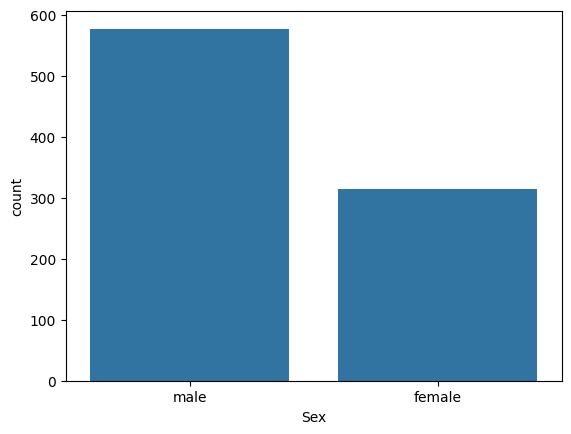

In [9]:
sns.countplot(x = train['Sex'])

<Axes: xlabel='SibSp', ylabel='count'>

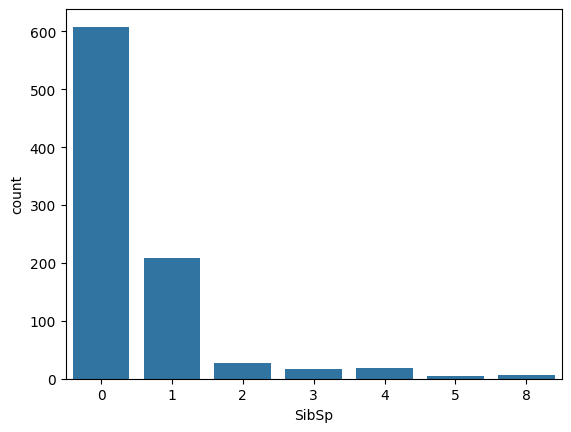

In [10]:
sns.countplot(x = train['SibSp'])

<Axes: xlabel='Parch', ylabel='count'>

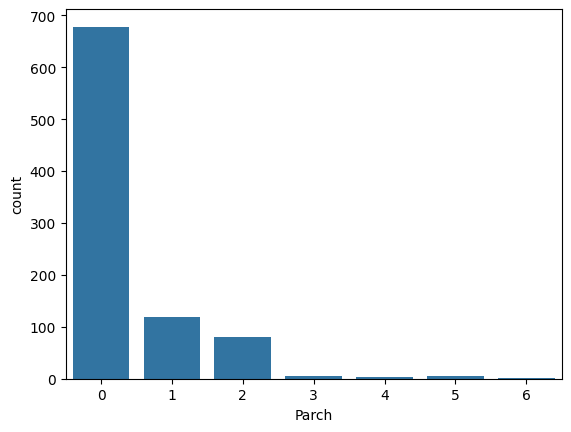

In [11]:
sns.countplot(x = train['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

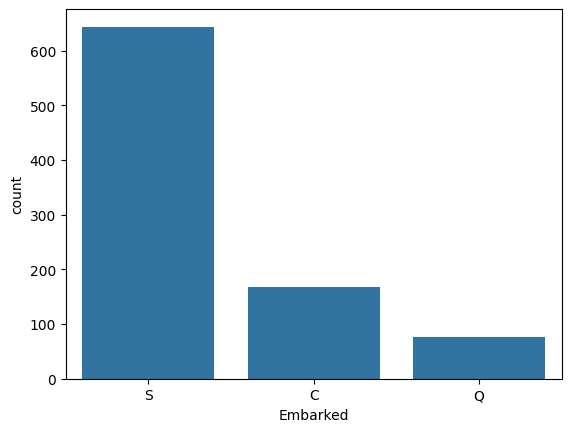

In [12]:
sns.countplot(x = train['Embarked'])

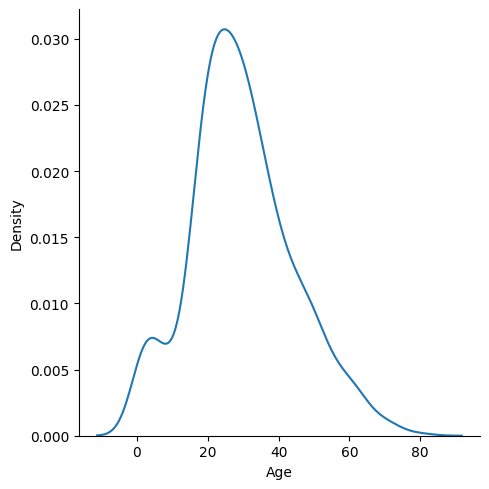

In [13]:
# Numerical Attributes
sns.displot(x = train['Age'], kind='kde')

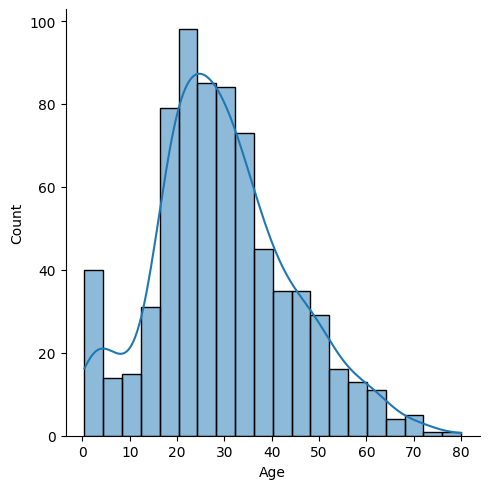

In [14]:
sns.displot(x = train['Age'], kde = True)

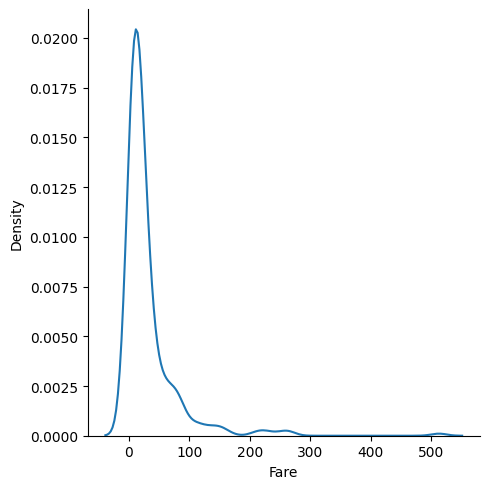

In [15]:
sns.displot(x = train['Fare'], kind='kde')

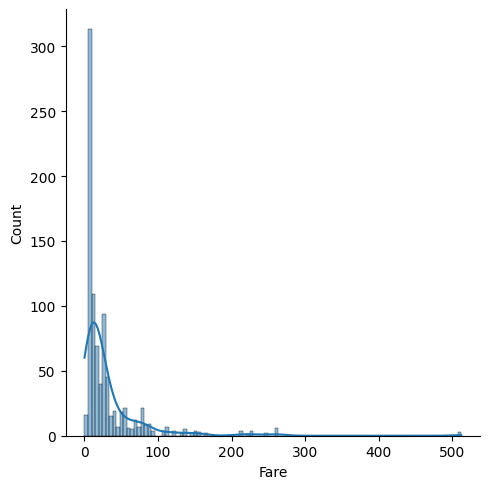

In [16]:
sns.displot(x = train['Fare'], kde = True)

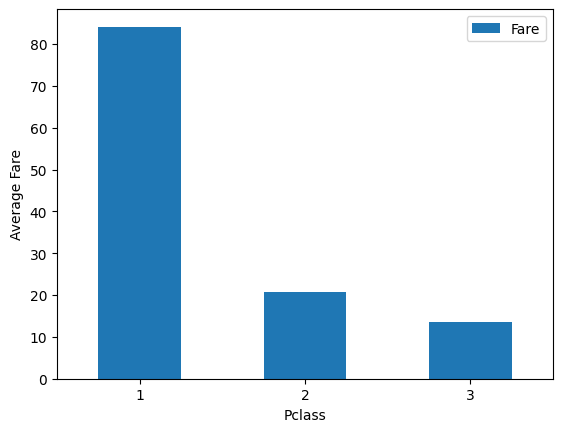

In [17]:
class_fare = train.pivot_table(index = 'Pclass', values = 'Fare')
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation = 0)
plt.show()

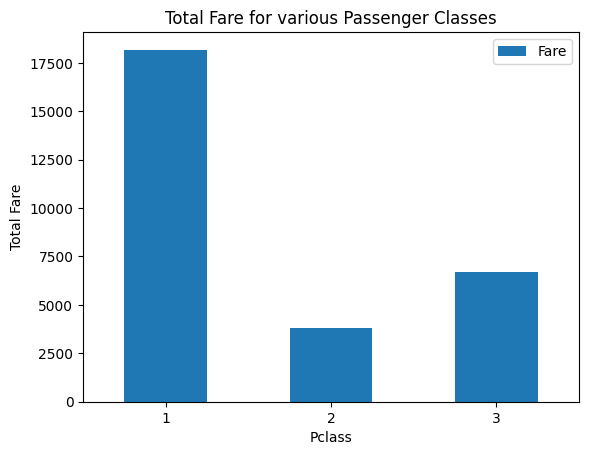

In [18]:
class_fare = train.pivot_table(index = 'Pclass', values = 'Fare', aggfunc=np.sum)
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation = 0)
plt.title('Total Fare for various Passenger Classes')
plt.show()

In [19]:
# Data Preprocessing

In [20]:
train_len = len(train)
# Combine two dataframes
df = pd.concat([train, test], axis = 0)
df = df.reset_index()

In [21]:
df.head()
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
# Finding the null values
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
# Delete the column Cabin
df = df.drop(columns = ['Cabin'], axis=1)

In [24]:
df['Age'].mean()

29.881137667304014

In [25]:
# Fill missing values with the mean of the column - For numerical columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [26]:
df['Embarked'].mode()[0]

'S'

In [27]:
# Fill missing values with the mode of the column - Since this column has categorical values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

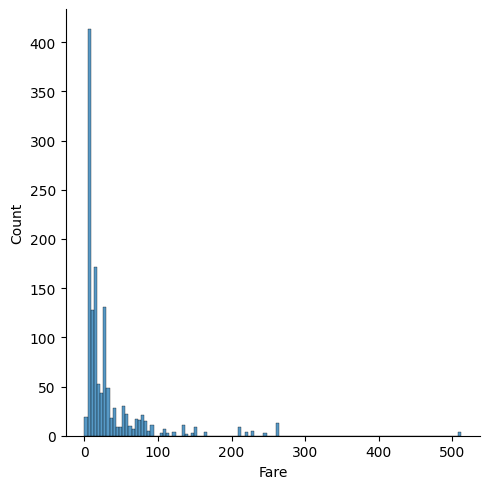

In [28]:
# Balancing the data for the fare column
sns.displot(df['Fare'])

In [30]:
# Log transformation to get uniform distribution
df['Fare'] = np.log(df['Fare'] + 1)

In [31]:
df['Fare']

0       2.110213
1       4.280593
2       2.188856
3       3.990834
4       2.202765
          ...   
1304    2.202765
1305    4.699571
1306    2.110213
1307    2.202765
1308    3.150952
Name: Fare, Length: 1309, dtype: float64

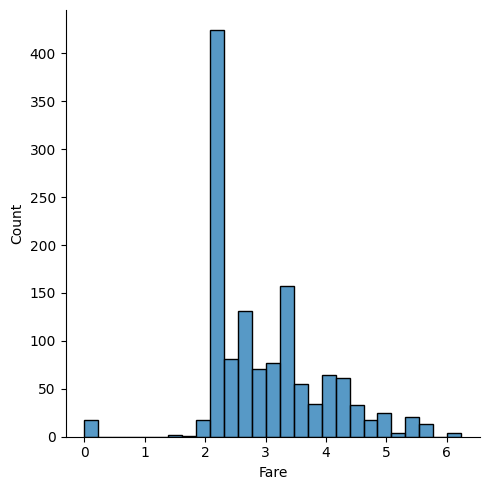

In [34]:
sns.displot(df['Fare'])